Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.88      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



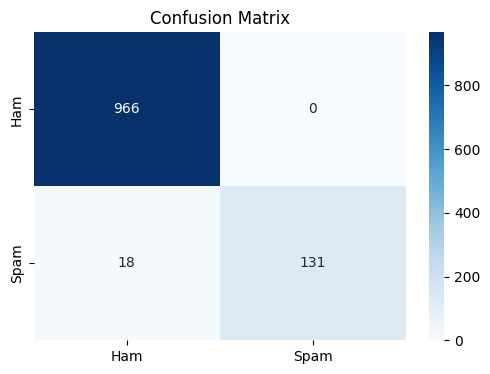


Predictions:
'Free prize now!' → Spam
'Hey, lunch tomorrow?' → Ham


In [ ]:

import pandas as pd
import urllib.request
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


DATASET_URL = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
urllib.request.urlretrieve(DATASET_URL, "spam.csv")


df = pd.read_csv('spam.csv', sep='\t', header=None, names=['label', 'text'])
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['text'])
y = df['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = MultinomialNB()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], 
            yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix")
plt.show()


def predict_spam(text):
    vec_text = vectorizer.transform([text])
    return "Spam" if model.predict(vec_text)[0] == 1 else "Ham"


print("\nPredictions:")
print("'Free prize now!' →", predict_spam("Free prize now!"))
print("'Hey, lunch tomorrow?' →", predict_spam("Hey, lunch tomorrow?"))